## Translate

In [23]:
import cv2
import numpy as np
import os

# === Parameters ===
data_root = "/home/minsukc/SIO/data/"
# input_path = "Chest_X-Ray_1.png"
input_path = "ct_chest_1.jpeg"
# input_path = "ct_chest_2.png"
# input_path = "CT_Slice_3.jpg"
# input_path = "CT_Slice_4.png"
x_shift = 100   # shift along x-axis (positive → right, negative → left)
y_shift = 100  # shift along y-axis (positive → down, negative → up)

In [24]:
# === Load the image ===
image = cv2.imread(os.path.join(data_root, input_path))

if image is None:
    raise FileNotFoundError(f"Could not load image from {input_path}")

# === Get image dimensions ===
height, width = image.shape[:2]

# === Define translation matrix ===
M = np.float32([[1, 0, x_shift],
                [0, 1, y_shift]])

# === Apply translation ===
translated = cv2.warpAffine(image, M, (width, height))

# === Save the output ===
output_path = input_path.split('.')[0] + '_translated_' + str(x_shift) + '_' + str(y_shift) + '.' + input_path.split('.')[-1]
cv2.imwrite(os.path.join(data_root, output_path), translated)

print("original size:", image.shape)
print("translated amount: (", x_shift, ",", y_shift, ")")
print(f"Translated image saved to {output_path}")

original size: (2155, 2444, 3)
translated amount: ( 100 , 100 )
Translated image saved to ct_chest_1_translated_100_100.jpeg


## Resize

In [9]:
import cv2
import matplotlib.pyplot as plt
import os

# === Parameters ===
data_root = "/home/minsukc/SIO/data/"
# input_path = "ct_chest_1.jpeg"
input_path = "ct_chest_2.png"

target_width = 1024

In [10]:
# === Load image ===
image = cv2.imread(os.path.join(data_root, input_path))
if image is None:
    raise FileNotFoundError(f"Could not load image from {input_path}")

orig_h, orig_w = image.shape[:2]

# === Compute height to preserve aspect ratio ===
scale = target_width / orig_w
target_height = int(orig_h * scale)

# === Resize ===
resized = cv2.resize(image, (target_width, target_height), interpolation=cv2.INTER_LINEAR)

# === Save output ===
output_path = (
    f"{input_path.split('.')[0]}_resized_{target_width}x{target_height}."
    f"{input_path.split('.')[-1]}"
)

cv2.imwrite(os.path.join(data_root, output_path), resized)

# === Print sizes ===
print("Original size:", image.shape)
print("Resized size:", resized.shape)
print("Saved:", output_path)

Original size: (1024, 1024, 3)
Resized size: (1024, 1024, 3)
Saved: ct_chest_2_resized_1024x1024.png


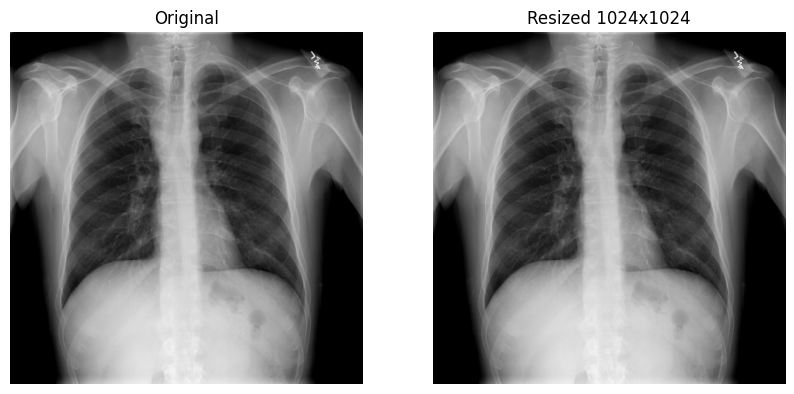

In [11]:
# === Display inline ===
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.title(f"Resized {target_width}x{target_height}")
plt.imshow(resized_rgb)
plt.axis("off")

plt.show()